Energikilde    0
Retning        0
Målernavn      0
Måler-Id       0
Verdi          0
Tidspunkt      0
dtype: int64
Unnamed: 0           0
starting_at          0
solar_consumption    0
dtype: int64
property_id       0
starting_at       0
temperature       0
wind_speed        0
wind_direction    0
cloud_fraction    0
precipitation     0
dtype: int64


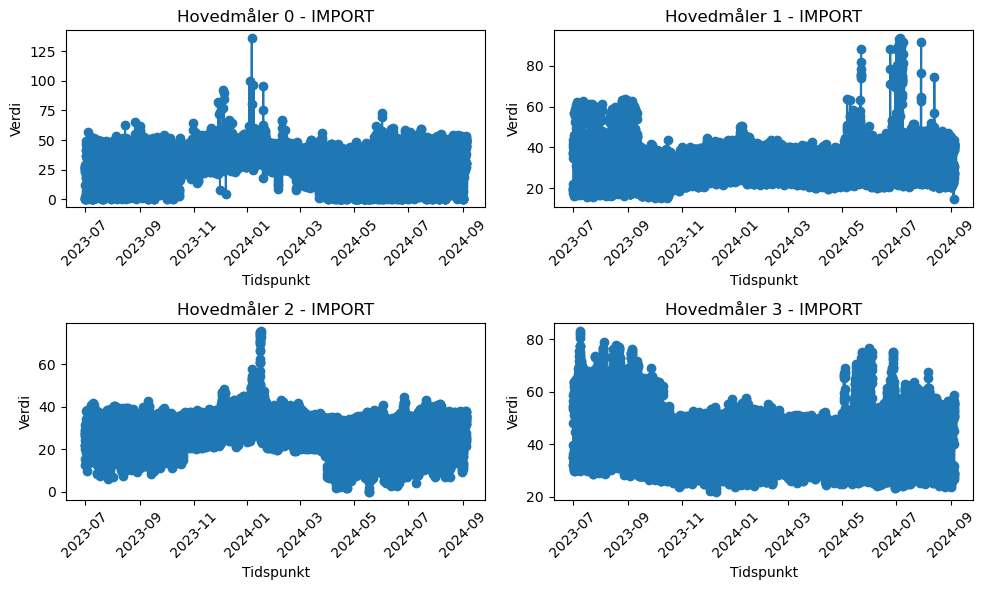

Peak for Hovedmåler 0: 135.9
Peak for Hovedmåler 1: 93.4
Peak for Hovedmåler 2: 75.68
Peak for Hovedmåler 3: 83.2


In [4]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

energy_import_export = pd.read_csv('energy_import_export.csv')
solar_self_consumption_main_building = pd.read_csv('solar_self_consumption_main_building.csv')
timeseries_met_data = pd.read_csv('timeseries_met_data_202409050822.csv')


print(energy_import_export.isnull().sum())
print(solar_self_consumption_main_building.isnull().sum())
print(timeseries_met_data.isnull().sum())

energy_import_export['Tidspunkt'] = pd.to_datetime(energy_import_export['Tidspunkt'])
# Filter the data for each 'Måler-Id' (Hovedmåler 0, 1, 2, 3)
hovedmaler_0 = energy_import_export[energy_import_export['Måler-Id'] == 0]
hovedmaler_1 = energy_import_export[energy_import_export['Måler-Id'] == 1]
hovedmaler_2 = energy_import_export[energy_import_export['Måler-Id'] == 2]
hovedmaler_3 = energy_import_export[energy_import_export['Måler-Id'] == 3]

# Filter the data for each Hovedmåler and 'IMPORT' in the 'Retning' column
hovedmaler_0_import = hovedmaler_0[hovedmaler_0['Retning'] == 'IMPORT']
hovedmaler_1_import = hovedmaler_1[hovedmaler_1['Retning'] == 'IMPORT']
hovedmaler_2_import = hovedmaler_2[hovedmaler_2['Retning'] == 'IMPORT']
hovedmaler_3_import = hovedmaler_3[hovedmaler_3['Retning'] == 'IMPORT']

# Create the plots
plt.figure(figsize=(10, 6))

# Plot for Hovedmåler 0
plt.subplot(2, 2, 1)
plt.plot(hovedmaler_0_import['Tidspunkt'], hovedmaler_0_import['Verdi'], marker='o')
plt.title('Hovedmåler 0 - IMPORT')
plt.xlabel('Tidspunkt')
plt.ylabel('Verdi')
plt.xticks(rotation=45)

# Plot for Hovedmåler 1
plt.subplot(2, 2, 2)
plt.plot(hovedmaler_1_import['Tidspunkt'], hovedmaler_1_import['Verdi'], marker='o')
plt.title('Hovedmåler 1 - IMPORT')
plt.xlabel('Tidspunkt')
plt.ylabel('Verdi')
plt.xticks(rotation=45)

# Plot for Hovedmåler 2
plt.subplot(2, 2, 3)
plt.plot(hovedmaler_2_import['Tidspunkt'], hovedmaler_2_import['Verdi'], marker='o')
plt.title('Hovedmåler 2 - IMPORT')
plt.xlabel('Tidspunkt')
plt.ylabel('Verdi')
plt.xticks(rotation=45)

# Plot for Hovedmåler 3
plt.subplot(2, 2, 4)
plt.plot(hovedmaler_3_import['Tidspunkt'], hovedmaler_3_import['Verdi'], marker='o')
plt.title('Hovedmåler 3 - IMPORT')
plt.xlabel('Tidspunkt')
plt.ylabel('Verdi')
plt.xticks(rotation=45)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


# Find and print the peak (maximum value) for each Hovedmåler
peak_hovedmaler_0 = hovedmaler_0['Verdi'].max()
peak_hovedmaler_1 = hovedmaler_1['Verdi'].max()
peak_hovedmaler_2 = hovedmaler_2['Verdi'].max()
peak_hovedmaler_3 = hovedmaler_3['Verdi'].max()

print("Peak for Hovedmåler 0:", peak_hovedmaler_0)
print("Peak for Hovedmåler 1:", peak_hovedmaler_1)
print("Peak for Hovedmåler 2:", peak_hovedmaler_2)
print("Peak for Hovedmåler 3:", peak_hovedmaler_3)

